# Create Ensemble Classifier

In [2]:
# find good indices to keep for the final classifier trainer
# load data
import pandas as pd
import numpy as np
import random
random.seed(17332)

training_path = "../../Test_data/train.json"
testing_path = "../../Test_data/test.json"

train_data = pd.read_json(training_path)
#test_data = pd.read_json(testing_path)

# the majority of the na's are 1508:
nums = random.sample(range(0,1507),60)

#train_data.inc_angle = train_data.inc_angle.replace('na',0)
# idx_tr = np.where(train_data.inc_angle==0)

hold_out_train = train_data.iloc[nums]
new_train = train_data.loc[~train_data.index.isin(list(nums))]



# get distribution of classes
bergs = hold_out_train['is_iceberg'].value_counts()
print(bergs)

print(len(train_data))
print(len(hold_out_train))
print(len(new_train))
#print(train_data.tail(5))

print('complete')

0    31
1    29
Name: is_iceberg, dtype: int64
1604
60
1544
complete


In [3]:
# get the data together

# load model submissions
basic_model = pd.read_csv("sub_full_basic_ensem.csv")
inc_model = pd.read_csv("sub_full_inc2_ensem.csv")
trans_model = pd.read_csv("sub_full_transfer_incV3_ensem.csv")

# load and concat the inc angles and iceberg response
ids = hold_out_train["id"]
inc_angles = hold_out_train["inc_angle"]
inc_id = pd.concat([ids, inc_angles], axis = 1)

bergs = hold_out_train["is_iceberg"]
berg_id = pd.concat([ids, bergs], axis = 1)

# start merging
merged = pd.merge(basic_model, inc_model, how='inner', on='id')
merged = pd.merge(merged, trans_model, how='inner', on='id')

merged.rename(index=str, columns={"is_iceberg_x": "basic",
                                  "is_iceberg_y": "inc",
                                 "is_iceberg": "trans"}, inplace=True)

merged = pd.merge(merged, inc_id, how='inner', on='id')
merged = pd.merge(merged, berg_id, how='inner', on='id')

# merged_drop = merged.drop(['id'], axis=1)

print(merged.head(5))



         id     basic       inc     trans inc_angle  is_iceberg
0  30911a15  0.002004  0.061473  0.014261   39.6382           0
1  388c5565  0.998357  0.963781  0.941938   35.2987           1
2  13c7bc95  0.877538  0.656549  0.690479   42.5848           1
3  8c733ab0  0.000116  0.007244  0.000079   43.9011           0
4  d4bb8bac  0.000443  0.347724  0.000101   44.4612           0


In [57]:
# add some noise to the data
# create individual 'noised' columns for each, doubling size of data
from sklearn.utils import shuffle

basic_noise = np.random.normal(0, 0.06, [60])
inc_noise = np.random.normal(0, 0.06, [60])
trans_noise = np.random.normal(0, 0.06, [60])
angle_noise = np.random.normal(0, 1.5, [60])

basic_fake = np.clip(merged.basic + basic_noise, 0.0001, .9999)
new_basic = pd.concat([merged.basic, basic_fake], axis = 0)

inc_fake = np.clip(merged.inc + inc_noise, 0.0001, .9999)
new_inc = pd.concat([merged.inc, inc_fake], axis = 0)

trans_fake = np.clip(merged.trans + trans_noise, 0.0001, .9999)
new_trans = pd.concat([merged.trans, trans_fake], axis = 0)

angle_fake = merged.inc_angle + angle_noise
new_angle = pd.concat([merged.inc_angle, angle_fake], axis = 0)

new_berg = pd.concat([merged.is_iceberg, merged.is_iceberg], axis = 0)


new_data = pd.concat([new_basic, new_inc, new_trans, new_angle, new_berg], axis = 1)
new_data = new_data.reset_index(drop=True)
new_data = shuffle(new_data)
print(new_data)
print(len(new_data))
#print(len(basic_fake))

        basic       inc     trans inc_angle  is_iceberg
75   0.695324  0.559608  0.508705   44.1864           1
27   0.961777  0.768645  0.950849   45.2714           1
40   0.012635  0.141305  0.019585   34.7715           0
44   0.882883  0.913473  0.985211    42.559           1
32   0.296301  0.276056  0.042057   33.9014           0
45   0.995226  0.996165  0.999950   42.5644           1
83   0.000100  0.164095  0.075448   43.6588           0
3    0.000116  0.007244  0.000079   43.9011           0
41   0.970926  0.888066  0.991794   38.4755           1
67   0.999900  0.905621  0.999900   31.9828           1
7    0.988838  0.935425  0.999803   33.6383           1
109  0.699645  0.858320  0.733305   34.9691           0
101  0.961082  0.964407  0.999900   39.4696           1
82   0.125324  0.337094  0.023344   42.7643           0
110  0.050582  0.522720  0.022634   40.2459           0
70   0.999900  0.888019  0.930383   36.8462           1
117  0.125947  0.112724  0.061317    41.448     

X train: 84
X test: 36
y train: 84
y test: 36


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[0.98999999999999999, 0.98999999999999999, 0.02, 0.98999999999999999, 0.01, 0.050000000000000003, 0.98999999999999999, 0.98999999999999999, 0.56000000000000005, 0.98999999999999999, 0.98999999999999999, 0.01, 0.45000000000000001, 0.85999999999999999, 0.98999999999999999, 0.01, 0.01, 0.71999999999999997, 0.01, 0.98999999999999999, 0.87, 0.41999999999999998, 0.98999999999999999, 0.98999999999999999, 0.01, 0.98999999999999999, 0.98999999999999999, 0.28999999999999998, 0.01, 0.01, 0.32000000000000001, 0.070000000000000007, 0.13, 0.47999999999999998, 0.46999999999999997, 0.26000000000000001]
[1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0]
confusion matrix:
[[16  0]
 [ 3 17]]
 
accuracy:  0.916666666667
feature importance
[('basic', 0.43140090347019178), ('inc', 0.23329045181167193), ('trans', 0.2731245446639004), ('inc_angle', 0.062184100054235941)]


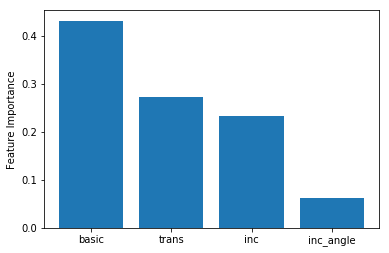

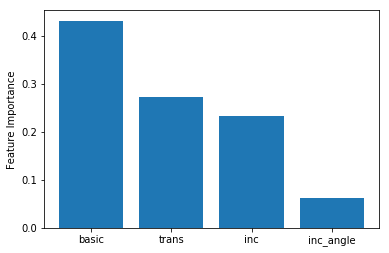

In [64]:
# more preprocessing/ model creation, fitting
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

#newDf    = Df.loc[:,['Vibration','eccentricity']]
X = new_data.loc[:,['basic', 'inc', 'trans', 'inc_angle']]
y = new_data.loc[:,['is_iceberg']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X train:", len(X_train))
print("X test:", len(X_test))
print("y train:", len(y_train))
print("y test:", len(y_test))

clf = RandomForestClassifier(n_estimators = 100, n_jobs=2, random_state=0)

# fit model
clf.fit(X_train, y_train)

# get predictions and evaluate
preds = clf.predict(X_test)
probs = clf.predict_proba(X_test)

final_probs = [np.clip(x[1], 0.01, 0.99) for x in probs]
print(final_probs)
print(preds)
print("confusion matrix:")
print(confusion_matrix(y_test, preds, labels=[0,1]))
print(" ")
print("accuracy: ", accuracy_score(y_test, preds))



# feature importance
print("feature importance")
print(list(zip(X_train, clf.feature_importances_)))

feat_imp = list(zip(X_train, clf.feature_importances_))
# visualize top feature importances
# sorting top down
imp_sorted = sorted(feat_imp, key=lambda tup: tup[1], reverse=True)

# save each seperately
feat = [x[0] for x in imp_sorted]
score = [x[1] for x in imp_sorted]
x_pos = np.arange(len(imp_sorted))


# plot the top 20
# cant read the names, whatever, can see elbow is around 9
plt.bar(x_pos[:20], score[:20],align='center')
plt.xticks(x_pos[:20], feat[:20]) 
plt.ylabel('Feature Importance')
plt.show()

# showing the top 9
plt.bar(x_pos[:9], score[:9],align='center')
plt.xticks(x_pos[:9], feat[:9]) 
plt.ylabel('Feature Importance')
plt.show()

In [67]:
import pickle

# save the model to disk
filename = 'rf_ensem_mod.sav'
pickle.dump(clf, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)